In [16]:
inf = open('input.txt', 'r')
line = inf.readline()
print(line)

inf.close()

In [17]:
outf = open('input.txt', 'w')
for num in range(1, 11):
    outf.write(str(num) + '\n')
outf.close()

In [18]:
import csv

file = open('Stars.csv', 'w')

newRecord = 'Brian, 73, Taurus\n'
file.write(str(newRecord))

file.close()

file = open('Stars.csv', 'a')

name = input('Enter a name: ')
age = input('Enter a age: ')
star = input('Enter star sign: ')

newRecord = name + ',' + age + ',' + star + '\n'
file.write(str(newRecord))
file.close()

file = open('Stars.csv', 'r')
for row in file:
    print(row)

file = open('Stars.csv' ,'r')
search = input('Enter the data you are searching for: ')
reader = csv.reader(file)
for row in file:
    if search in str(row):
        print(row)

Enter a name:  Martin
Enter a age:  22
Enter star sign:  5


Brian, 73, Taurus

Martin,22,5



Enter the data you are searching for:  5


Martin,22,5



In [22]:
import sys
print(len(sys.argv))
print(sys.argv[0])

if len(sys.argv) > 1:
    print('The remaining arguments are: ')
    for i in range(1, len(sys.argv)):
        print('', sys.argv[1])
else:
    print('There are no additional arguments')

3
C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py
The remaining arguments are: 
 -f
 -f


In [27]:
import pandas as pd

df = pd.read_csv('shopping.csv',parse_dates=['Date'], dayfirst=True)
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Apples,10,0.5,NaN
1,2023-01-02,Bananas,5,0.2,NaN
2,2023-01-03,Oranges,8,0.6,NaN
3,2023-02-01,Apples,12,0.5,NaN
4,2023-02-05,Bananas,7,0.2,NaN
5,2023-03-10,Apples,6,0.5,NaN
6,2023-03-15,Bananas,9,0.2,NaN


In [28]:
df.fillna({'Product': 'Unknown', 'Quantity': 0, 'Price': 0.0, 'Total': 0.0}, inplace=True)

df['Total'] = df['Quantity'] * df['Price']
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Apples,10,0.5,5.0
1,2023-01-02,Bananas,5,0.2,1.0
2,2023-01-03,Oranges,8,0.6,4.8
3,2023-02-01,Apples,12,0.5,6.0
4,2023-02-05,Bananas,7,0.2,1.4
5,2023-03-10,Apples,6,0.5,3.0
6,2023-03-15,Bananas,9,0.2,1.8


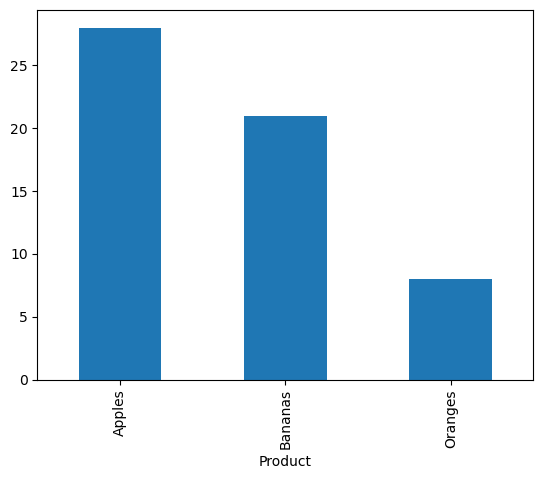

In [29]:
import matplotlib.pyplot as plt

product_sales = df.groupby('Product')['Quantity'].sum()
product_sales.plot(kind='bar')
plt.show()

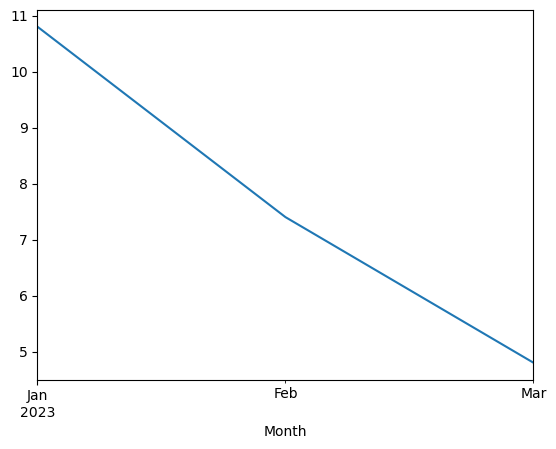

In [31]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum()
monthly_sales.plot(kind='line')
plt.show()

In [32]:
print(df.groupby('Month'))

In [35]:
import numpy as np

def check(arr):
    return np.all(arr != 0)

a = np.array([1, 2, 3])
print(check(a))



True


In [37]:
array1 = np.array([45, 67, 23])
array2 = np.array([56, 23, 89])

print('Greater: ', np.greater(array1, array2))
print('Equal: ', np.equal(array1, array2))
print('Less: ', np.less(array1, array2))

Greater:  [False  True False]
Equal:  [False False False]
Less:  [ True False  True]


In [41]:
zeros = np.zeros(8)
ones = np.ones(5)
fives = np.full(10, 5)

ones

array([1., 1., 1., 1., 1.])

In [18]:
import sqlite3

with sqlite3.connect('PhoneBook1.db') as db:
    cursor = db.cursor()

cursor.execute('''create table if not exists Names(
id integer primary key,
firstname text,
surname text,
phonenumber text);''')

# cursor.execute('''insert into Names(id, firstname, surname, phonenumber) 
# values (1, 'Simon', 'Pierre', '0143678 9056');''')
# db.commit()



In [19]:
cursor.execute('''select * from Names;''')
for data in cursor.fetchall():
    print(data)

selected_surname = input()
cursor.execute('select * from Names where surname = ?;', [selected_surname])
for data in cursor.fetchall():
    print(data)
    
db.close()

(1, 'Simon', 'Pierre', '0143678 9056')


 Pierre


(1, 'Simon', 'Pierre', '0143678 9056')


In [27]:
import pandas as pd
import numpy as np

assessment_results = {'name': ['Anastasia', 'Paul', 'Kathe', 'Joseph', 'Linda', 'Michael', 'Matt', 
'Laurentine', 'Chirstian', 'Jonas'],
'score': [12.5, 10, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(assessment_results)
print(df.head(3))

mask = df['attempts'] > 2
print(df[mask])

# count the number of rows and columns of a DataFrame
rows, cols = df.shape
print(rows, cols)

print(df[(df['score'] >= 14) & (df['score'] <= 20)])

df['label'] = labels
df.loc[df['label'] == 'c', 'score'] = 11.5
print(df)



        name  score  attempts qualify
0  Anastasia   12.5         1     yes
1       Paul   10.0         3      no
2      Kathe   16.5         2     yes
      name  score  attempts qualify
1     Paul   10.0         3      no
3   Joseph    NaN         3      no
5  Michael   20.0         3     yes
10 4
      name  score  attempts qualify
2    Kathe   16.5         2     yes
5  Michael   20.0         3     yes
6     Matt   14.5         1     yes
9    Jonas   19.0         1     yes
         name  score  attempts qualify label
0   Anastasia   12.5         1     yes     a
1        Paul   10.0         3      no     b
2       Kathe   11.5         2     yes     c
3      Joseph    NaN         3      no     d
4       Linda    9.0         2      no     e
5     Michael   20.0         3     yes     f
6        Matt   14.5         1     yes     g
7  Laurentine    NaN         1      no     h
8   Chirstian    8.0         2      no     i
9       Jonas   19.0         1     yes     j


In [42]:
import numpy as np
import pandas as pd
import array

a = []
for i in range(1, 6):
    a.append(i)

b = array.array('i', [6, 7, 8, 9, 10])
print(a)
print(b)

c = np.arange(0, 10)
print(c[4])
print(c[-1])

d = np.arange(1, 10).reshape(3, 3)
print(d[1][2])
print(d[0, :])
print(d[:, 0])

arr = np.arange(10, 20)
print(arr[3:8])
print(arr[1::2])

print('arr1')
arr1 = np.arange(1, 17).reshape(4, 4)
print(arr1)
print(arr1[1:3, 2:4])
print(arr1[-3:-1, :])
print(arr1[:, 0:2])

arr2 = np.arange(0, 10)
print(arr2[arr2 > 5])
print(arr2[arr2 % 2 == 0])

arr3 = np.arange(1, 17).reshape(4, 4)


[1, 2, 3, 4, 5]
array('i', [6, 7, 8, 9, 10])
4
9
6
[1 2 3]
[1 4 7]
[13 14 15 16 17]
[11 13 15 17 19]
arr1
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[ 7  8]
 [11 12]]
[[ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2]
 [ 5  6]
 [ 9 10]
 [13 14]]
[6 7 8 9]
[0 2 4 6 8]


In [1]:
import pandas as pd

mydict = {'red': 250, 'blue': 560}
colors = ['red', 'blue', 'green']
myseries = pd.Series(mydict, index=colors)
myseries

red      250.0
blue     560.0
green      NaN
dtype: float64

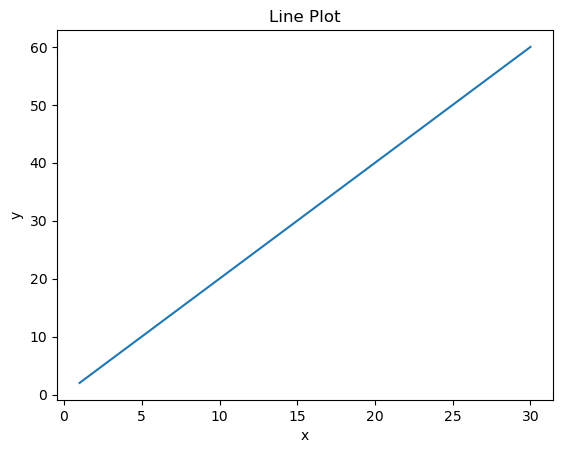

In [3]:
import matplotlib.pyplot as plt


x = []
for i in range(1, 31):
    x.append(i)

y = []
for i in x:
    y.append(2 * i)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.show()

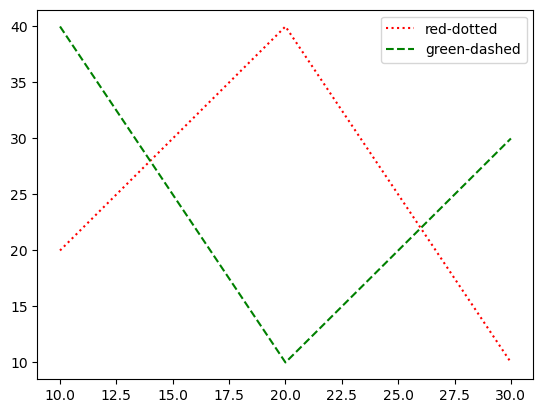

In [12]:
import numpy as np


x = np.linspace(10, 30, 3)
y1 = [20, 40, 10]
y2 = [40, 10, 30]

plt.plot(x, y1, 'r:', label='red-dotted')
plt.plot(x, y2, 'g--', label='green-dashed')
plt.legend()
plt.show()

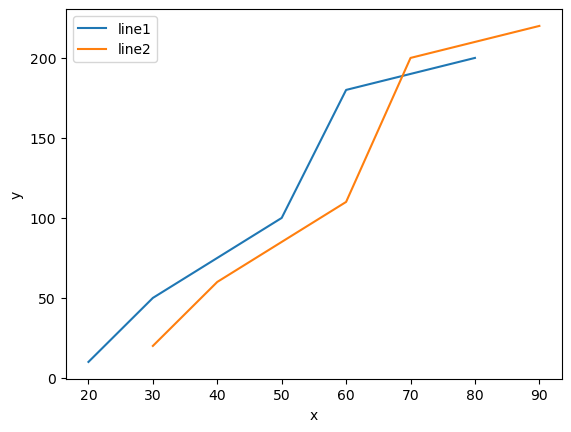

In [14]:
x1 = [20, 30, 50, 60, 80]
y1 = [10, 50, 100, 180, 200]
x2 = [30, 40, 60, 70, 90]
y2 = [20, 60, 110, 200, 220]

plt.plot(x1, y1, label='line1')
plt.plot(x2, y2, label='line2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

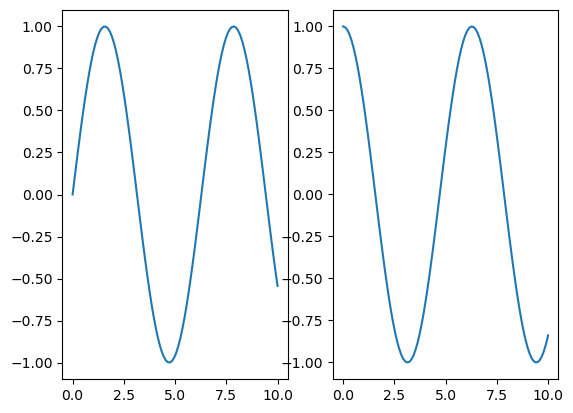

In [19]:
x = np.linspace(0, 10,100)
y1 = np.sin(x)
y2 = np.cos(x)
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, y1)
axes[1].plot(x, y2)
plt.show()

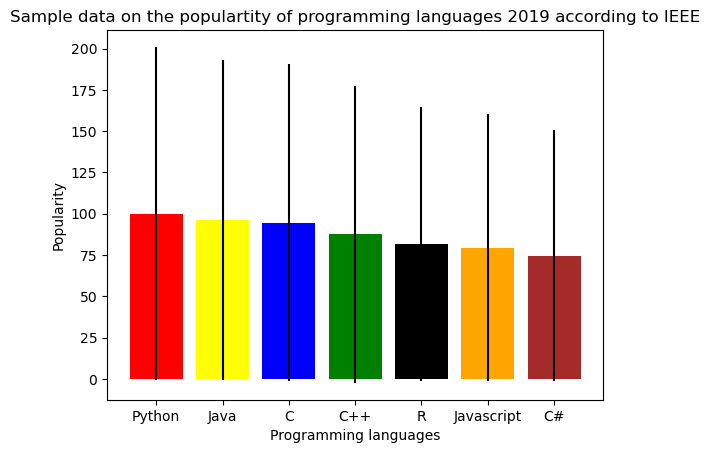

In [30]:
x = ['Python', 'Java', 'C', 'C++', 'R', 'Javascript', 'C#']
y = [100, 96.3, 94.4, 87.5, 81.5, 79.4, 74.5]
colors = ['red', 'yellow', 'blue', 'green', 'black', 'orange', 'brown']
err = [101, 97, 96, 90, 83, 81, 76]
plt.bar(x, y, color=colors, yerr=err)
plt.title('Sample data on the populartity of programming languages 2019 according to IEEE')
plt.xlabel('Programming languages')
plt.ylabel('Popularity')
plt.show()

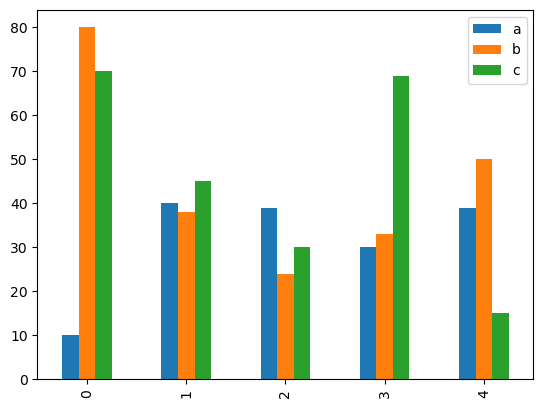

In [28]:
import pandas as pd


df = pd.DataFrame({
    'a': [10, 40, 39, 30, 39],
    'b': [80, 38, 24, 33, 50],
    'c': [70, 45, 30, 69, 15]})

df.plot(kind='bar')
plt.show()

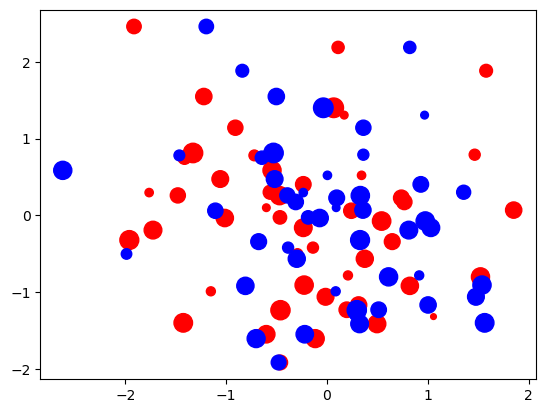

In [34]:
import numpy as np

np.random.seed(42)
x = np.random.randn(50)
y = np.random.randn(50)
z = np.random.randn(50)
sizes = np.random.randint(10, 200, 50)

plt.scatter(x, z, s= sizes, color='red')
plt.scatter(y, z, s= sizes, color='blue')
plt.show()